# Экспериментальное задание 2-го контеста

> К одной из задач B-E напишите три реализации: полностью невекторизованную (без использования numpy), частично векторизованную и полностью векторизованную. Сравните время работы трёх реализаций на данных разного размера, постройте графики зависимости времени работы алгоритмов от размера входных данных. Оформить короткий ipython notebook и прислать.

В данном ноутбуке анализируется время работы разных подходов при решении задачи D (get_max_before_zero). Напомним ее условие:

*Написать функцию get_max_before_zero(x)* (для краткости будем называть ее **gmbz**), *возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Если подходящих элементов нет, функция должна возвращать None.*

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

## Реализации

Пойдем в обратном порядке, начиная с эффективной реализации.

In [2]:
def gmbz_vect(x):
    y = x[1:][(x == 0)[:-1]]
    if y.size == 0:
        return None
    return y.max()

В приведенной выше функции векторизовано сравнение с нулем и поиск максимума. Обычно индексацию с помощью булевского массива и numpy-версию слайсинга не относят к векторизации, несмотря на то что они оптимизированы.  
В следующей функции мы немного расстроим код, заменив метод `ndarray.max` на стандартный питоновский максимум.

In [3]:
def gmbz_half_blood(x):
    y = x[1:][(x == 0)[:-1]]
    if y.size == 0:
        return None
    return max(y)

Наконец, приведем реализацию без использования numpy.

In [4]:
def gmbz_naive(x):
    idx = [i for i, elem in enumerate(x) if elem == 0]
    if x[-1] == 0:
        idx.pop()
    y = [x[i + 1] for i in idx]
    if len(y) == 0:
        return None
    return max(y)

Итак, у нас имеется три версии искомой функции, использующих одинаковые **алгоритм** и **сигнатуру**, но реализованных с разным уровнем **векторизации вычислений**.

## Генерация данных

Будем создавать случайные целочисленные векторы с фиксированной долей нулей.

In [5]:
rng = np.random.default_rng(seed=42)

def get_vect(size):
    zero_num = size // 5
    sample = rng.integers(1, np.iinfo(np.uint16).max, size-zero_num, np.uint16)
    return rng.permutation(np.concatenate([sample, np.zeros(zero_num, np.uint16)]))

## Измерение времени рыботы

In [6]:
gmbz = [gmbz_naive, gmbz_half_blood, gmbz_vect]

def get_times(lens, n_vects):
    vects = (get_vect(lens[-1]) for _ in range(n_vects))
    results = np.zeros((3, len(lens)))
    for vect in tqdm(vects):
        for j, size in tqdm(enumerate(lens)):
            for i in range(3):
                cur_slice = vect[:size]
                cur_mean = %timeit -q -r 1 -o gmbz[i](cur_slice)
                results[i][j] += cur_mean.average
    results /= n_vects
    return results

Поскольку генерация случайных векторов и копирования здесь самые дорогие, но при этом незамеряемые операции, будем действовать кумулятивно, отсекая от вновь сгенерированного вектора участки нужной длины. Количество векторов регулируется параметром `n_vect` - в результате функция усредняет результат по ним.  
*Ситуация: всячески уварачиваемся от циклов в реализациях, но делаем тройной в эксперименте... 🙄*

In [7]:
lens = [np.arange(100, 5001, 100), np.arange(5, 43, 6)]
results = [get_times(lens[0], 5) * 1000, get_times(lens[1], 5) * 1000]

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:04,  4.76s/it]
2it [00:11,  5.32s/it]
3it [00:15,  5.07s/it]
4it [00:21,  5.12s/it]
5it [00:27,  5.41s/it]
6it [00:34,  5.87s/it]
7it [00:37,  5.20s/it]
8it [00:41,  4.80s/it]
9it [00:45,  4.59s/it]
10it [00:50,  4.55s/it]
11it [00:54,  4.59s/it]
12it [00:59,  4.64s/it]
13it [01:04,  4.75s/it]
14it [01:09,  4.89s/it]
15it [01:15,  5.03s/it]
16it [01:20,  5.19s/it]
17it [01:26,  5.37s/it]
18it [01:32,  5.59s/it]
19it [01:38,  5.78s/it]
20it [01:45,  6.00s/it]
21it [01:52,  6.28s/it]
22it [01:59,  6.56s/it]
23it [02:06,  6.78s/it]
24it [02:14,  7.03s/it]
25it [02:22,  7.29s/it]
26it [02:30,  7.58s/it]
27it [02:39,  7.86s/it]
28it [02:44,  7.13s/it]
29it [02:53,  7.77s/it]
30it [03:03,  8.33s/it]
31it [03:09,  7.65s/it]
32it [03:15,  7.21s/it]
33it [03:22,  6.95s/it]
34it [03:28,  6.83s/it]
35it [03:31,  5.76s/it]
36it [03:38,  6.11s/it]
37it [03:45,  6.41s/it]
38it [03:53,  6.71s/it]
39it [03:56,  5.78s/it]
40it [04:00,  5.14s/it]
41it [04:04

## Графики

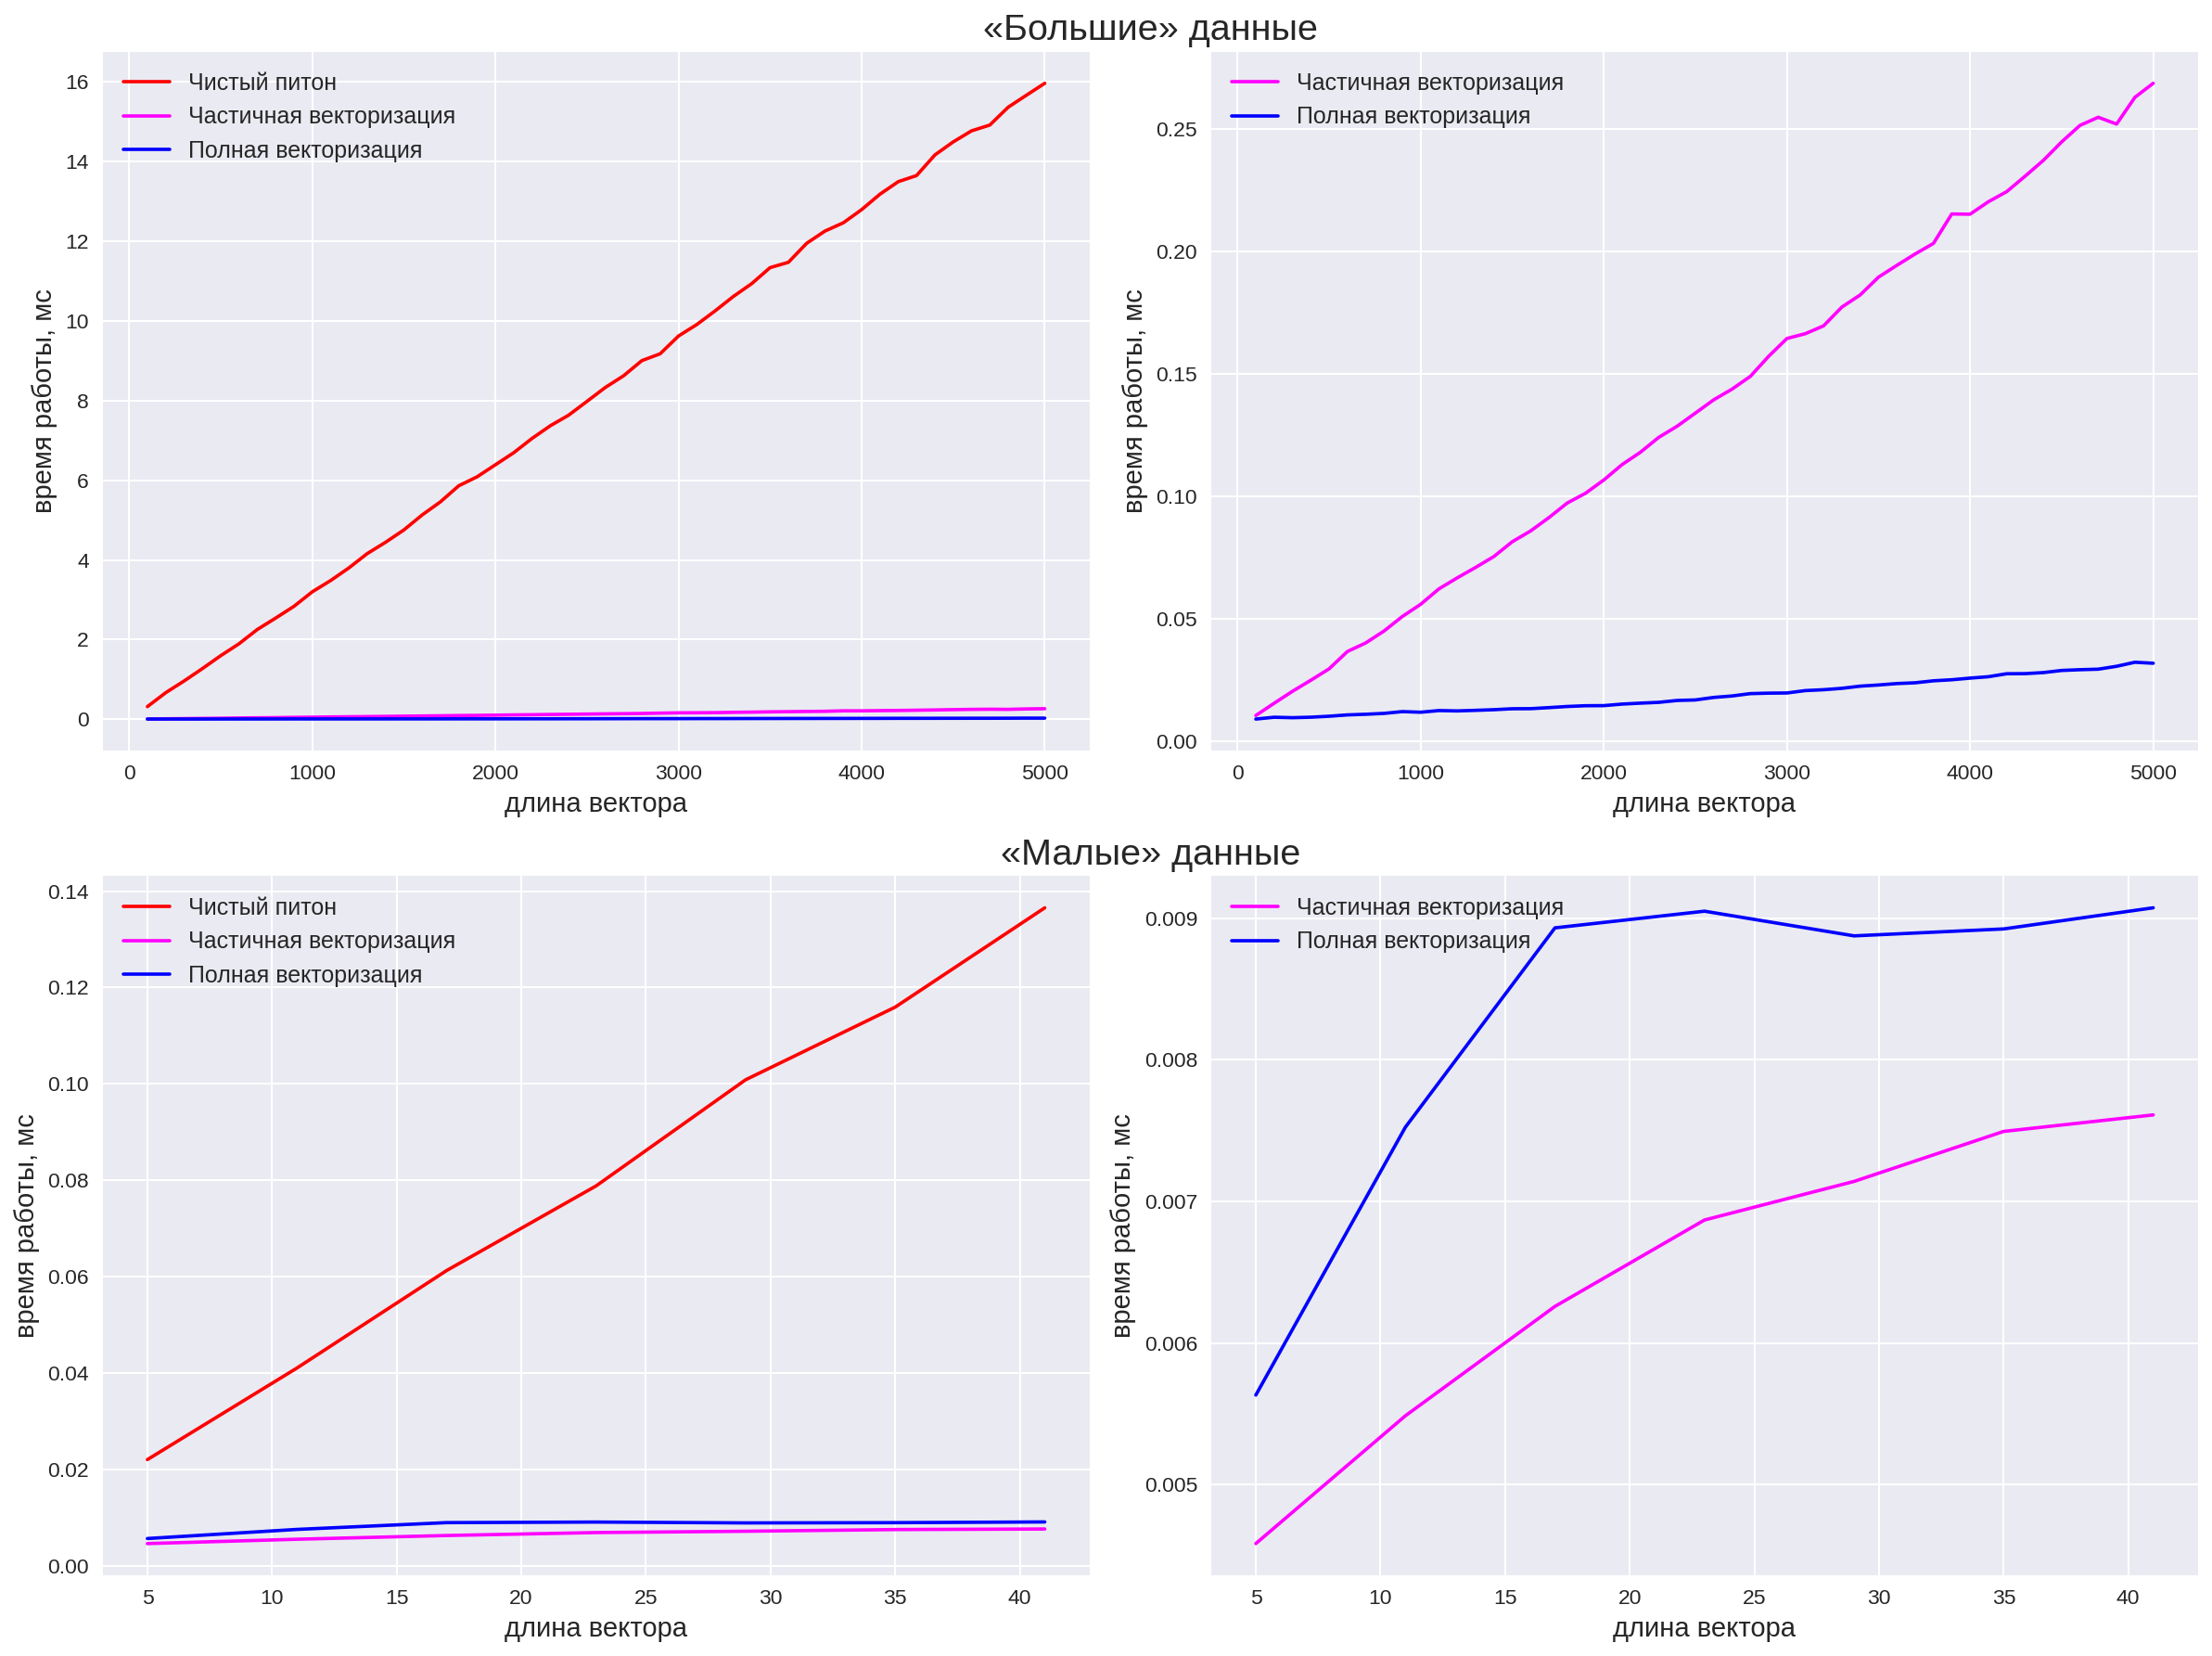

In [8]:
plt.style.use('seaborn')
plt.rc('axes', titlesize=19)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=11)
plt.rc('legend', fontsize=12)

fig, invisible_axes = plt.subplots(figsize=(16, 12), nrows=2, dpi=150) 

data = ['Большие', 'Малые']

for i in range(2):
    invisible_axes[i].set_title(f'«{data[i]}» данные')
    invisible_axes[i].axis('off')
    ax = fig.add_subplot(2, 2, 2*i + 1)
    
    ax.plot(lens[i], results[i][0], color='red')
    ax.plot(lens[i], results[i][1], color='magenta')
    ax.plot(lens[i], results[i][2], color='blue')
    ax.legend(('Чистый питон', 'Частичная векторизация', 'Полная векторизация'),
               loc='upper left')
    ax.set_xlabel('длина вектора')
    ax.set_ylabel('время работы, мс')
    
    ax = fig.add_subplot(2, 2, 2*i + 2)
    ax.plot(lens[i], results[i][1], color='magenta')
    ax.plot(lens[i], results[i][2], color='blue')
    ax.legend(('Частичная векторизация', 'Полная векторизация'),
               loc='upper left')
    ax.set_xlabel('длина вектора')
    ax.set_ylabel('время работы, мс')

plt.tight_layout()

- Что ж, алгоритм действительно имеет линейную сложность 👀
- Как и следовало ожидать, на длинных векторах мощность векторизации по сравнению со стандартным питоном колоссальна. 
- Причем даже если использовать ее «по случаю», как это вышло в частичной реализации. 
- Для коротких векторов она тоже сохраняет преимущество, которое, однако нивелируется с уменьшением объема данных.
- Отдельного внимания заслуживает левый нижний график: в данном случае частичная векторизация оказалась быстрее полной. Этот результат также интерпретируем: в «серединной» реализации осталось векторизованной поэлементное сравнение (используемой для булевской индексации), что не только быстрее как операция, но и избавляет от необходимости создания ненужных списков индексов. А вот numpy-версия функции `max()` проигрывает встроенной в питон.

Таким, векторизованные вычисления **значительно выигрывают** в скорости при работе с **большими массивами** данных. Для **маленьких** же выборок они оказываются не столь полезными.